In [9]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
audio_PME = torch.load('data/dic_PME.pt')
audio_Q4  = torch.load('data/dic_Q4.pt')

In [97]:
L = []

audio_PME = torch.load('data/dic_PME.pt')
IDs = list(lyrics_PME.keys())

for ID in IDs:
    try:
        L.append(len(audio_PME[ID][0][0])/44100)
    except:
        pass
    
audio_Q4 = torch.load('data/dic_Q4.pt')
IDs = list(lyrics_Q4.keys())

for ID in IDs:
    try:
        L.append(len(audio_PME[ID][0][0])/44100)
    except:
        pass

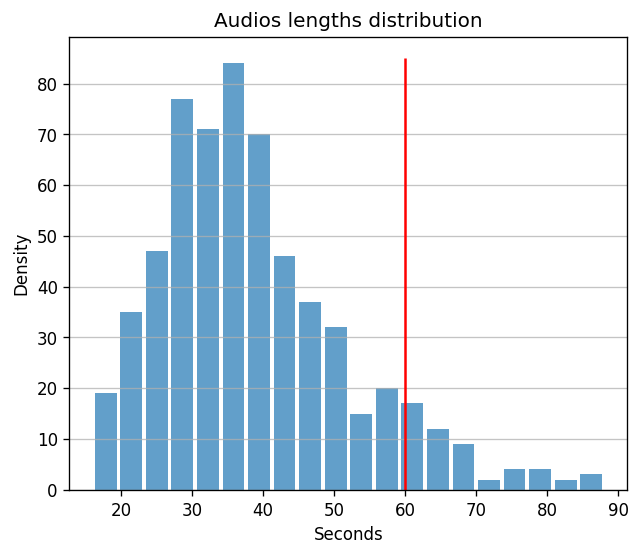

In [104]:
plt.figure(figsize=(6,5),dpi=120)
n, bins, patches = plt.hist(x=L, bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(60,0,85,'r')
plt.xlabel('Seconds')
plt.ylabel('Density')
plt.title('Audios lengths distribution')
maxfreq = n.max()

In [105]:
L = []

lyrics_PME = torch.load('./data/dic_PME_lyrics.pt')
L_PME = [len(l) for l in list(lyrics_PME.values())]
print('have {} lyrics'.format(len(list(lyrics_PME.keys()))))

lyrics_Q4 = torch.load('./data/dic_Q4_lyrics.pt')
L_PME = [len(l) for l in list(lyrics_Q4.values())]
print('have {} lyrics'.format(len(list(lyrics_Q4.keys()))))

L = L_PME+L_PME

have 629 lyrics
have 479 lyrics


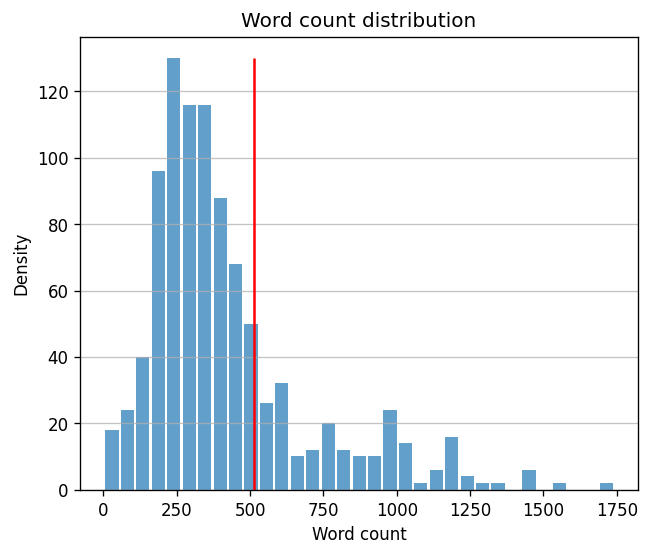

In [107]:
plt.figure(figsize=(6,5),dpi=120)
n, bins, patches = plt.hist(x=L, bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(512,0,130,'r')
plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Word count distribution')
maxfreq = n.max()

In [19]:
#df_Q4 = pd.read_csv('./data/Q4_meta.csv')
#df_D  = pd.read_csv('./data/DEAM_meta.csv')
df_P  = pd.read_csv('./data/PME_meta.csv')
meta = df_P#.append(df_Q4).reset_index()

In [20]:
meta['Valence'] = meta['VA']
meta['Arousal'] = meta['AR']

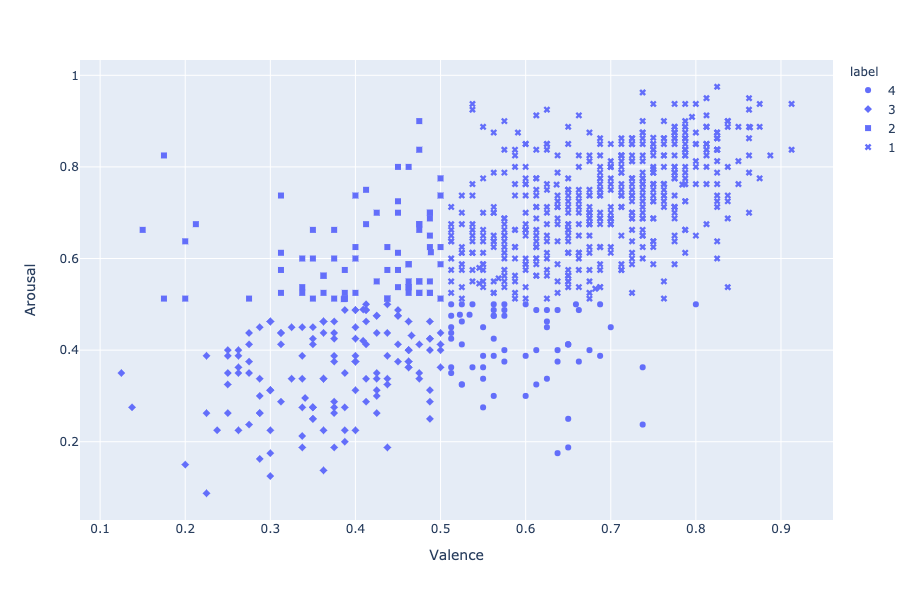

In [21]:
import plotly.express as px
fig = px.scatter(meta.dropna(), x="Valence", y="Arousal", symbol='label',width=600, height=600)
fig.show()

In [22]:
meta['tmp'] = 1

In [23]:
data = meta.groupby("label")['tmp'].sum()
data

label
1    491
2     76
3    138
4     62
Name: tmp, dtype: int64

In [55]:
[1/c for c in [0.64,0.09,0.18,0.08]]

[1.5625, 11.11111111111111, 5.555555555555555, 12.5]

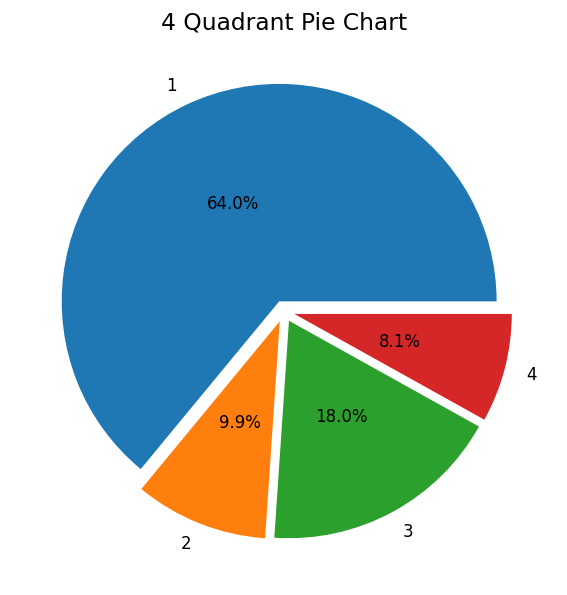

In [45]:
pie, ax = plt.subplots(figsize=[10,6],dpi=120)
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("4 Quadrant Pie Chart", fontsize=14);
pie.savefig("DeliveryPieChart.png")

In [1]:
t = 'Emotion/model/Audio_4Q_Cnn10_fold-0/best_net.pt'

In [4]:
load_path = './model/{}{}/best_net.pt'.format(t.split('/')[-2][:-1],0)

In [5]:
load_path

'./model/Audio_4Q_Cnn10_fold-0/best_net.pt'